### Visualizing the dataset


In [1]:
import os
import pandas as pd
import soundfile as sf
from scipy import signal 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#get the path of the file 
file_name = "Dataset\\birdsong_metadata.csv"
current_dir = os.getcwd() 

file_path = os.path.join(current_dir, file_name) 
print("File path:", file_path)

File path: C:\Users\bensa\Documents\Aberdeen University\University\Year 4\Session 2\EG4578\BirdClassification\Dataset\birdsong_metadata.csv


In [3]:
df_birdsongs_metadata = pd.read_csv(file_path)
display(df_birdsongs_metadata)

,file_id,genus,species,english_cname,who_provided_recording,country,latitude,longitute,type,license
0,132608,Acanthis,flammea,Common Redpoll,Jarek Matusiak,Poland,50.7932,15.4995,"female, male, song",http://creativecommons.org/licenses/by-nc-sa/3.0/
1,132611,Acanthis,flammea,Common Redpoll,Jarek Matusiak,Poland,50.7932,15.4995,"flight call, male, song",http://creativecommons.org/licenses/by-nc-sa/3.0/
2,35068,Acanthis,flammea,Common Redpoll,Sander Bot,Netherlands,52.8176,6.4326,"call, song",http://creativecommons.org/licenses/by-nc-nd/2.5/
3,82715,Acrocephalus,palustris,Marsh Warbler,Dougie Preston,United Kingdom,60.3539,-1.2689,Song,http://creativecommons.org/licenses/by-nc-nd/2.5/
4,64685,Acrocephalus,palustris,Marsh Warbler,Dougie Preston,United Kingdom,60.3539,-1.2689,Song,http://creativecommons.org/licenses/by-nc-nd/2.5/
...,...,...,...,...,...,...,...,...,...,...
259,132392,Turdus,philomelos,Song Thrush,david m,United Kingdom,54.1200,-0.5445,song,http://creativecommons.org/licenses/by-nc-nd/3.0/
260,146756,Turdus,philomelos,Song Thrush,David Darrell-Lambert,United Kingdom,51.6608,0.0031,song,http://creativecommons.org/licenses/by-nc-sa/3.0/
261,27060,Vanellus,vanellus,Northern Lapwing,Patrik berg,Sweden,58.4051,14.3028,song,http://creativecommons.org/licenses/by-nc-sa/3.0/
262,97982,Vanellus,vanellus,Northern Lapwing,Herman van der Meer,Netherlands,52.1520,4.3470,"call, song",http://creativecommons.org/licenses/by-nc-nd/2.5/


In [4]:
unique_bird_names = set(df_birdsongs_metadata["english_cname"])
print("Birds: ", unique_bird_names)
print("Number of unique birds: ", len(unique_bird_names))

Birds:  {'Eurasian Blue Tit', 'Common Redshank', 'Common Redpoll', 'Common Cuckoo', 'Spotted Flycatcher', 'Great Spotted Woodpecker', 'Eurasian Tree Sparrow', 'European Golden Plover', 'Red Crossbill', 'European Greenfinch', 'Willow Warbler', 'Eurasian Wryneck', 'Eurasian Collared Dove', 'Western Yellow Wagtail', 'Common Swift', 'Song Thrush', 'European Nightjar', 'Redwing', 'Tawny Owl', 'Common Starling', 'Eurasian Coot', 'European Robin', 'Rock Dove', 'Common Blackbird', 'European Herring Gull', 'Eurasian Nuthatch', 'Common Whitethroat', 'Coal Tit', 'Willow Tit', 'Common Wood Pigeon', 'Eurasian Skylark', 'Stock Dove', 'Tree Pipit', 'Common Chaffinch', 'Garden Warbler', 'Northern Lapwing', 'Western Jackdaw', 'Lesser Whitethroat', 'Common House Martin', 'House Sparrow', 'African Pied Wagtail', 'Eurasian Oystercatcher', 'Rook', 'European Green Woodpecker', 'Black Woodpecker', 'Barn Swallow', 'Corn Bunting', 'Common Snipe', 'Eurasian Treecreeper', 'Common Nightingale', 'Wood Warbler', 'W

In [5]:
# print the number of occurrences of each bird
print(df_birdsongs_metadata['english_cname'].value_counts().to_dict())

{'Common Redpoll': 3, 'Marsh Warbler': 3, 'European Green Woodpecker': 3, 'Eurasian Magpie': 3, 'Willow Warbler': 3, 'Wood Warbler': 3, 'Common Chiffchaff': 3, 'Common Redstart': 3, 'Common Pheasant': 3, 'European Honey Buzzard': 3, 'Coal Tit': 3, 'Grey Partridge': 3, 'Eurasian Tree Sparrow': 3, 'House Sparrow': 3, 'Great Tit': 3, 'Eurasian Golden Oriole': 3, 'Spotted Flycatcher': 3, 'Western Yellow Wagtail': 3, 'African Pied Wagtail': 3, 'European Bee-eater': 3, 'Common Nightingale': 3, 'European Golden Plover': 3, 'Grey Plover': 3, 'Willow Tit': 3, 'Garden Warbler': 3, 'Song Thrush': 3, 'Common Blackbird': 3, 'Redwing': 3, 'Eurasian Wren': 3, 'Common Redshank': 3, 'Wood Sandpiper': 3, 'Lesser Whitethroat': 3, 'Common Whitethroat': 3, 'Eurasian Blackcap': 3, 'Marsh Tit': 3, 'Common Starling': 3, 'Tawny Owl': 3, 'European Turtle Dove': 3, 'Eurasian Collared Dove': 3, 'Eurasian Nuthatch': 3, 'Goldcrest': 3, 'Eurasian Bullfinch': 3, 'Dunnock': 3, 'Red Crossbill': 3, 'River Warbler': 3, '

### Inspecting the Audio files

In [7]:
# Create a spectogram for "Common Redpoll"

In [6]:
#get the directory of the bird songs
song_path = os.path.join(current_dir, "Dataset\\songs\\songs") 
print("Song path:", song_path)

Song path: C:\Users\bensa\Documents\Aberdeen University\University\Year 4\Session 2\EG4578\BirdClassification\Dataset\songs\songs


In [7]:
#select only the common redpoll data 
df_common_redpoll_data = df_birdsongs_metadata[df_birdsongs_metadata['english_cname'] == "Common Redpoll"]
#select the file_ids 
display(df_common_redpoll_data)

,file_id,genus,species,english_cname,who_provided_recording,country,latitude,longitute,type,license
0,132608,Acanthis,flammea,Common Redpoll,Jarek Matusiak,Poland,50.7932,15.4995,"female, male, song",http://creativecommons.org/licenses/by-nc-sa/3.0/
1,132611,Acanthis,flammea,Common Redpoll,Jarek Matusiak,Poland,50.7932,15.4995,"flight call, male, song",http://creativecommons.org/licenses/by-nc-sa/3.0/
2,35068,Acanthis,flammea,Common Redpoll,Sander Bot,Netherlands,52.8176,6.4326,"call, song",http://creativecommons.org/licenses/by-nc-nd/2.5/


In [8]:
#selecting one of the 3 files
sound_file = "xc132608.flac"
# sound_file = "xc132611.flac"
# sound_file = "xc35068.flac"

sound_file_path = os.path.join(song_path, sound_file)
print(sound_file_path)
print(os.path.isfile(sound_file_path))

C:\Users\bensa\Documents\Aberdeen University\University\Year 4\Session 2\EG4578\BirdClassification\Dataset\songs\songs\xc132608.flac
True


In [10]:
#load the audio file as a numpy array
audio_data, sample_rate = sf.read(sound_file_path) 
print("Sample rate: ", sample_rate)
duration_in_seconds = round(len(audio_data) / sample_rate, 2)
print(f"Audio duration: {duration_in_seconds} seconds")

Sample rate:  44100
Audio duration: 38.56 seconds


### Plot the audio signal and its spectogram

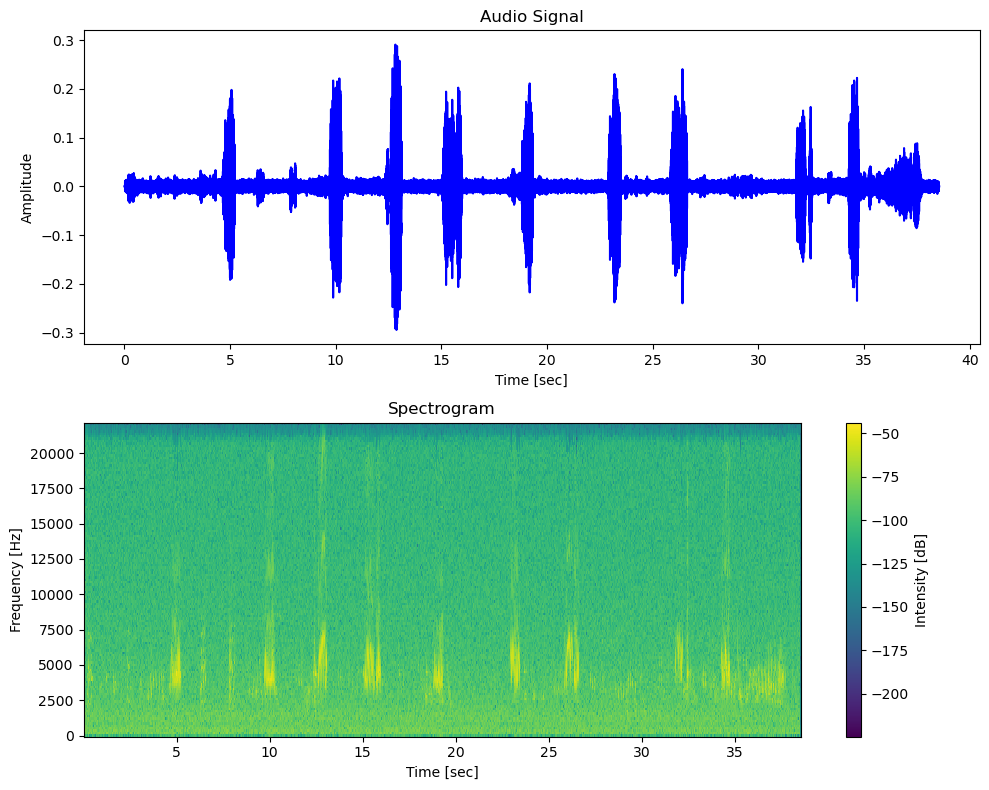

In [11]:
#Create a time axis for the audio signal
time_audio = np.arange(0, len(audio_data)) / sample_rate

#Create a spectrogram
frequencies, times, spectrogram = signal.spectrogram(audio_data, fs=sample_rate)

# Set the figure size
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Plot the audio signal on the top
ax1.plot(time_audio, audio_data, color='blue')
ax1.set_title('Audio Signal')
ax1.set_xlabel('Time [sec]')
ax1.set_ylabel('Amplitude')

# Plot the spectrogram on the bottom
pcm = ax2.pcolormesh(times, frequencies, 10 * np.log10(spectrogram), shading='auto')  # Using log scale for better visualization
ax2.set_ylabel('Frequency [Hz]')
ax2.set_xlabel('Time [sec]')
ax2.set_title('Spectrogram')

# Add colorbar to the figure
cbar = fig.colorbar(pcm, ax=ax2, label='Intensity [dB]')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()